In [119]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [120]:
df = pd.read_csv('../Vectores_Caracteristicos_Mariposas.csv')
X = df.drop('Etiqueta', axis=1)
y = df['Etiqueta']

In [121]:
print(X)

          C1       C2       C3       C4       C5      C6      C7      C8  \
0     534.00   515.50   659.25   458.00   449.75  752.00  732.00  450.50   
1       0.00     5.75    26.00    40.25    31.50    0.00    2.00   15.50   
2     348.00   461.75   475.25   462.50   279.50  443.00  593.75  628.75   
3     337.00   274.75   269.75   244.00   301.50  225.25  245.00  423.25   
4    1014.75   996.25   988.50   977.25   966.00  946.00  943.00  926.00   
..       ...      ...      ...      ...      ...     ...     ...     ...   
827   452.75   496.25   592.75   698.75   717.25  696.00  637.00  687.75   
828   663.75   431.75   462.75   461.25   181.25  744.75  491.75  332.75   
829   377.50   513.75   482.00   459.50   387.25  511.00  233.25  168.75   
830   246.50   271.75   118.75   248.00   184.00  290.25  277.00  455.00   
831  1020.00  1020.00  1020.00  1020.00  1020.00  637.00  272.00  492.25   

         C9     C10  ...    C567    C568    C569    C570    C571    C572  \
0    457.25

In [122]:
print(y)

0      6.0
1      2.0
2      3.0
3      1.0
4      1.0
      ... 
827    9.0
828    6.0
829    2.0
830    7.0
831    6.0
Name: Etiqueta, Length: 832, dtype: float64


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree')
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [124]:
print(f"presicion: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

presicion: 0.22

Classification Report:
               precision    recall  f1-score   support

         1.0       0.29      0.28      0.28        29
         2.0       0.14      0.04      0.06        28
         3.0       0.00      0.00      0.00        18
         4.0       0.11      0.12      0.12        24
         5.0       0.12      0.35      0.18        23
         6.0       0.53      0.27      0.36        37
         7.0       0.00      0.00      0.00        29
         8.0       0.80      0.73      0.76        11
         9.0       0.06      0.08      0.07        24
        10.0       0.25      0.56      0.35        27

    accuracy                           0.22       250
   macro avg       0.23      0.24      0.22       250
weighted avg       0.22      0.22      0.20       250



c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

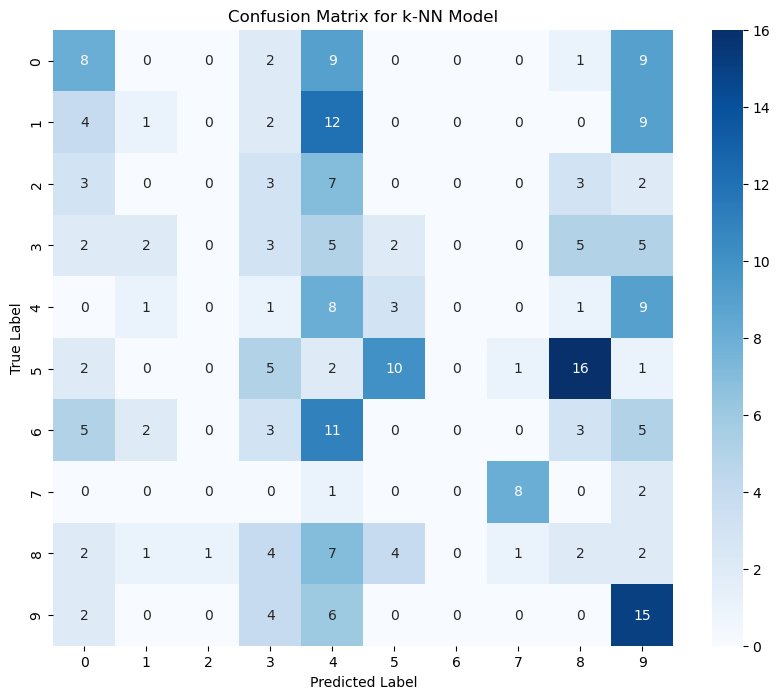

In [125]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=list(range(10)), 
            yticklabels=list(range(10)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k-NN Model')
plt.show()